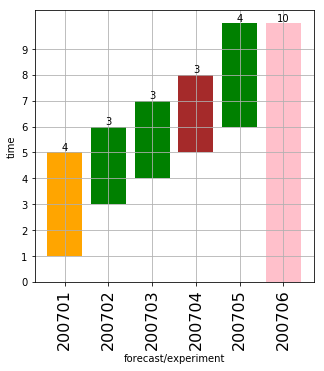

()

In [6]:
def check_valid_data_plot(**kwargs):
  '''
  various visual checks of forecast data etc
  '''
  import matplotlib.pyplot as plt
  import numpy as np

  import inspect
  
  Diag=forecasts=times=data=None
  xsize,ysize=5,5
  
  for key, value in kwargs.items():
    if(key=='Diag'):
      Diag=bool(value)
      #if(Diag): print('Diag=',Diag)
      if(Diag): print('plot_xy: Diagnostics turned on.')
    elif(key=='times'):
      if(Diag): print('Inputing times.')
      times=value
    elif(key=='forecasts'):
      if(Diag): print('Inputing forecasts.')
      forecasts=value
    elif(key=='data'):
      if(Diag): print('Inputing data.')
      data=value
    elif(key=='xysize'):
      if(Diag): print('Inputing xsize,ysize.')
      xsize,ysize=value
    else:
      raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))
      
  if(type(times)==type(None)):
    raise SystemExit('need times:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  if(type(forecasts)==type(None)):
    raise SystemExit('need forecasts:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      
  if(Diag): print('data=',data)

  data_shape=data.shape

  y = np.arange(len(times))

  x = np.arange(len(forecasts))

  top,bot,topMbot,colour = [],[],[],[]
  for i in range(data_shape[1]):
    bot.append(np.argmin(data[:,i]))
    top.append(data_shape[0] - np.argmin(data[::-1,i]))
    topMbot.append(top[i]-bot[i])

    min_val=np.min(data[:,i])
    max_val=np.max(data[:,i])

    if(max_val==1):
      colour.append('green')
    elif(max_val==2):
      colour.append('orange')
    elif(max_val>=3):
      colour.append('brown')

    elif(min_val<=1):
      colour.append('red')
    elif(min_val==1):
      colour.append('blue')
    else:
      colour.append('pink')    

    if(Diag): print('top,bot,topMbot,min_val,max_val,colour=',top,bot,topMbot,min_val,max_val,colour[i])

  fig, ax = plt.subplots()
  fig.set_size_inches(xsize, ysize)

  bar = plt.bar(x, topMbot, 0.8, bot, color=colour)
  plt.xticks(x, forecasts)
  plt.yticks(y, times)
  ax.set_xlabel('forecast/experiment')
  ax.set_ylabel('time')
  ax.grid()
  
  xticks=list(plt.xticks()[0])
  plt.xticks(xticks,fontsize=16,rotation='vertical')
  
  for cnt,rect in enumerate(bar):#same size as forecast.
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, top[cnt], '%d' % int(height), ha='center', va='bottom')

  plt.show()
  return() #end of check_valid_data_plot

import numpy as np
import numpy.ma as ma

%matplotlib inline


times=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
forecasts=[200701, 200702, 200703, 200704, 200705, 200706]

#create a dummy set:
check_valid_data=ma.masked_equal( np.zeros([len(times) ,len(forecasts)], dtype=int), 0) #time, forecast number

check_valid_data[1:5,0]=1

check_valid_data[3,0]=2
check_valid_data[3,3]=3

check_valid_data[3:6,1]=1
check_valid_data[4:7,2]=1
check_valid_data[5:8,3]=1
check_valid_data[6:10,4]=1
  
check_valid_data_plot(Diag=False, times=times, forecasts=forecasts, data=check_valid_data, xysize=(5,5))